# 16.4 Zadanie - porównanie metod Klasteringu

#### import niezbednych bibliotek

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

#### Wczytanie danych do DataFrame

In [5]:
train_data = pd.read_fwf("samsung_train.txt", header=None)
train_labels = pd.read_fwf("samsung_train_labels.txt", header=None)
test_labels = pd.read_fwf("samsung_test_labels.txt", header=None)
test_data = pd.read_fwf("samsung_test.txt", header=None)

In [6]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [7]:
train_labels

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [8]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [9]:
test_labels

,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


#### Wszystkie dane typu float informują o braku jakicholwiek innych typów danych w plikach. Również ponizsze Heatmapy pokazują że nie ma brakujących wpisów i dane sa pełne 

<Axes: >

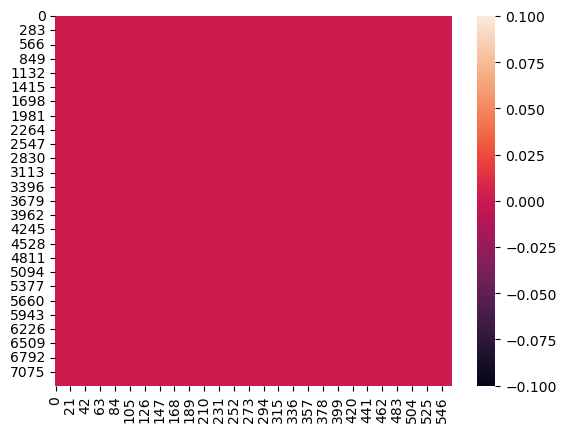

In [12]:
sns.heatmap(train_data.isnull())

<Axes: >

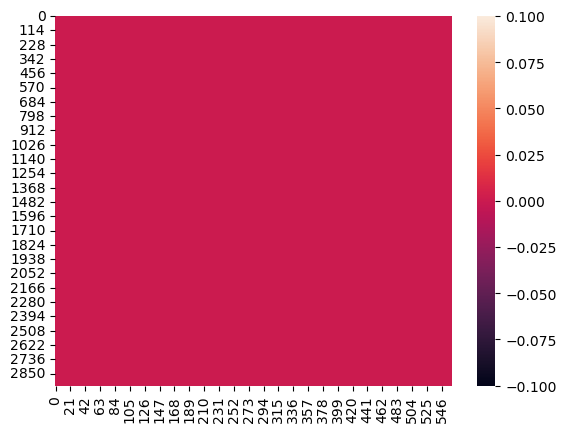

In [13]:
sns.heatmap(test_data.isnull())

<Axes: >

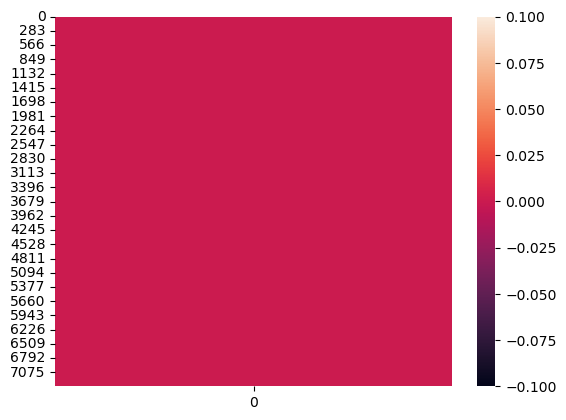

In [14]:
sns.heatmap(train_labels.isnull())

<Axes: >

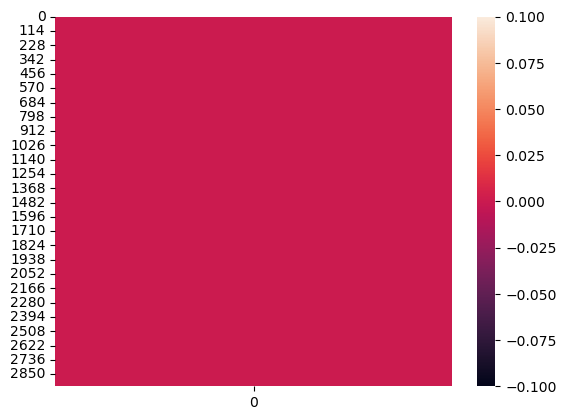

In [15]:
sns.heatmap(test_labels.isnull())

## Obróbka danych wejściowych 
#### Czy potrzeba wszystkich cech? ODP: Tak, cechy od 0 do 560 są nam wszytskie potrzebne do analizy, zawierają obrobione dane na temat przyspieszenia i prędkości
#### Czy potrzebna jest jakaś obróbka? ODP: Tak. żeby dokonać klasteryzacji należy dane skalować i wykonać PCA w celu zmniejszenia ilości wymiarów
#### Czy wiemy, jak obrobić? Tak. Jw.
#### Czy wiemy, co jaka cecha znaczy? ODP: Te cechy stanowią czasowy zapis przyspieszenia i prędkości z czujnika na pasie badanych osób. Zostały już częściowo przygotowane do analizy.
#### Czy potrzebujemy aż dwóch plików? ODP: Nie. Do klasteryzacji wystarczy jeden plik z danymi treningowymi. Dane z drugiego pliku można połączyć z danymi z pierwszego pliku by wyszkolone modele klasteryzacji były dokładniejsze. 
#### Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego? ODP: Podział na dane testowe i treningowe w przypadku klasteryzacji nie jest potrzebny. W drugiej cześci zadania gdzie mamy za zadanie użyć Supervised learning może być pomocny, gdyż nie trzeba bedzie preprowadzać train_test_split.

#### Ponieważ nie potrzebujemy danych testowych do poprawnego działania Clusteringu decydujemy się na połączenie zbioru treningowego i zbioru testowego w jeden data frame

In [18]:
df = pd.concat([train_data,test_data])
df.reset_index(inplace = True)
df.drop(['index'],axis=1,inplace=True)

#### nie potrzebujemy labelek, do wykonania clusteringu ale mogą się przydać do wizualizacji poprawności jego wykonania. Również łączymy zbiory pamiętając by kolejność łączenia była taka sama jak poprzednio (train a potem test data).

In [20]:
labels = pd.concat([train_labels,test_labels])
labels.reset_index(inplace = True)
labels.drop(['index'],axis=1,inplace=True)

#### Wykonujemmy skalowanie danych poprzedzające PCA. PCA wykonujemy z n_components=3, chcemy uzyskać wizualizację 3D. Przeprowadzamy skalowanie po PCA ze względu na KMeans. Tworzymy 3 kolumny 

In [22]:
df

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [23]:
Sc = StandardScaler()
stand_data = Sc.fit_transform(df)
pca = PCA(n_components=3) 
pca_data = pd.DataFrame(pca.fit_transform(stand_data),columns=['PC1','PC2','PC3'])
pca_data


,PC1,PC2,PC3
0,-16.392383,1.979407,3.441339
1,-15.593296,1.175288,-0.449888
2,-15.436910,2.246063,-1.427253
3,-15.662168,3.772916,-1.424778
4,-15.857151,4.450223,-1.968186
...,...,...,...
10294,10.151181,-6.464347,-1.137219
10295,12.123411,-4.851338,-0.717992
10296,11.831657,-3.393914,2.179404
10297,8.187779,-4.359550,1.204184


#### wybór liczby klastrów dla  KMeans -  elbow method

In [25]:
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(pca_data)
    for k in range(2, 20) 
]

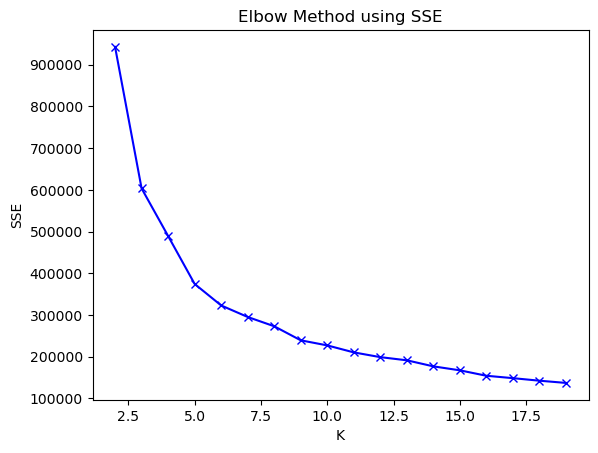

In [26]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

#### Metoda łokcia wskazuje że ilo,ść klastrów które nas interesują to 5 lub 6. Znamy odpowiedź na to pytanie dzieki labelkom dostarczonym z danymi więc wybierami liczbę 6. 

#### Definiujemy funkcję która wyświetli wizualizację danych po Clusteringu

In [29]:
def display_3d_chart(x,y,z,col,chart_title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=col, cmap='viridis', marker='.')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.title(f'{chart_title}')
    plt.show()

#### Definiujemy funkcję która wyświetli wizualizację danych z labelkami, by można było porównać go z wykresem dla Clusteringu

In [31]:
def color(category):
    dicti_col = dict(enumerate(['red','blue','green','orange','black','purple'],1))
    return dicti_col[category]
def labeling(category):
    dicti_task = dict(enumerate(['marsz','wchodz. po schodach','schodz. ze zchodow','siedzenie','stanie','lezenie'],1))
    return dicti_task[category]
def scatter_plot_3d_real(pca_data):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    for category in range (1,7):
        x = pca_data[pca_data['labels']==category].loc[:,['PC2']]
        y =  pca_data[pca_data['labels']==category].loc[:,['PC1']]
        z = pca_data[pca_data['labels']==category].loc[:,['PC3']]
        ax.scatter(x, y, z, c = color(category) , label=labeling(category), marker='.')
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend() 
    plt.title('3D Scatter plot with real descriptions')
    plt.show()


## Najpierw użyjemy metody KMeans

In [33]:
kmeans =KMeans(n_clusters=6).fit(pca_data)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
pca_data['labels'] = labels
pca_data

,PC1,PC2,PC3,cluster,labels
0,-16.392383,1.979407,3.441339,1,5
1,-15.593296,1.175288,-0.449888,1,5
2,-15.436910,2.246063,-1.427253,5,5
3,-15.662168,3.772916,-1.424778,5,5
4,-15.857151,4.450223,-1.968186,5,5
...,...,...,...,...,...
10294,10.151181,-6.464347,-1.137219,0,2
10295,12.123411,-4.851338,-0.717992,0,2
10296,11.831657,-3.393914,2.179404,0,2
10297,8.187779,-4.359550,1.204184,0,2


#### Wyświetlenie wyników

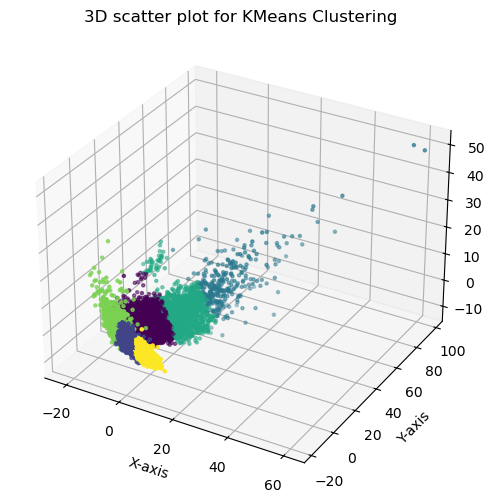

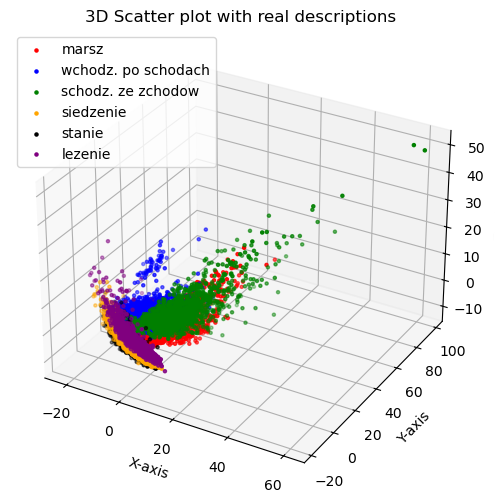

In [35]:
display_3d_chart(pca_data['PC2'],pca_data['PC1'],pca_data['PC3'],pca_data['cluster'],'3D scatter plot for KMeans Clustering')
scatter_plot_3d_real(pca_data)

#### metoda KMeans dokonała klasteryzacji danych ale nie w taki sposób jaki oczekiwaliśmy. Widać że dość dobrze rozdzela dane pomiedzy grupami gdzie jest ruch i gdzie ruchu nie ma (marsz, wchodzenie i zchodzenie vs stanie siedzenie i leżenie), ale nie radzi sobie z poprawnym rozdzielaniem konkretnych czynności w tych 2 podgupach. 

## metoda DBSCAN

In [38]:
pca_data.drop(['cluster','labels'],axis=1,inplace=True)

In [39]:
dbscan = DBSCAN(eps=3.5, min_samples=20)
db_scan = dbscan.fit(pca_data)
pca_data['cluster'] = pd.Categorical(db_scan.labels_)
pca_data['labels'] = labels

Ilość klastrow przy eps=3.5 i min_samples=20 [0, -1, 1, 2]
Categories (4, int64): [-1, 0, 1, 2]


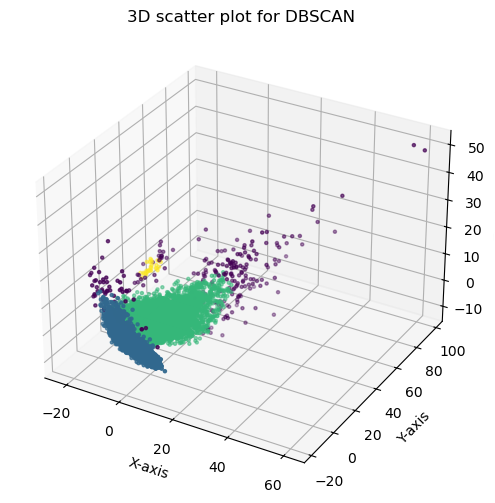

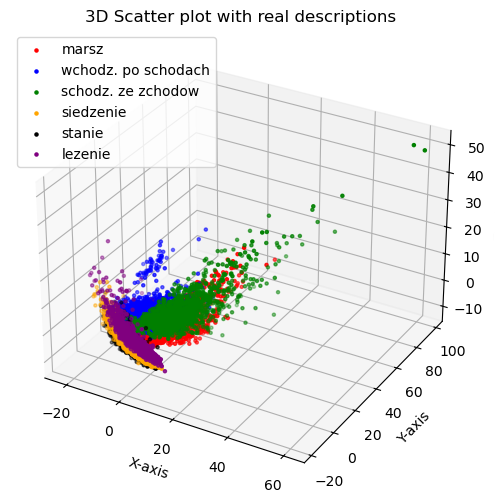

In [40]:
print('Ilość klastrow przy eps=3.5 i min_samples=20',pca_data['cluster'].unique())
display_3d_chart(pca_data['PC2'],pca_data['PC1'],pca_data['PC3'],pca_data['cluster'],'3D scatter plot for DBSCAN')
scatter_plot_3d_real(pca_data)

Udało się znaleźć wspóczynniki eps i min samples przy których metoda DBSCAN rozdziela dość dobrze dane dla czynności które wymagają aktywnego poruszania się i pozostawania w spoczynku, ale jak poprzednia nie jest w stanie prawidłowo rozdzielić czynności w tych 2 podgrupach. Widać również małą podgrupę dla wchodzenia po schodach która została sklasyfikowana osobno, jednak nie bierze pod uwagę pozostałych danych sklasyfikowanych do innej grupy. DBSCAN wyznaczył 3 podgrupy oraz wiele outlinerów.  

## metoda Gaussian Mixture Models

In [43]:
pca_data.drop(['cluster','labels'],axis=1,inplace=True)

In [44]:
gm = GaussianMixture(n_components=6, n_init=50, random_state=42, covariance_type="full")
gauss_mix = gm.fit(pca_data)
pca_data['cluster'] = pd.Categorical(gauss_mix.predict(pca_data))
pca_data['labels'] = labels

Ilość klastrow [3, 0, 4, 2, 1, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]


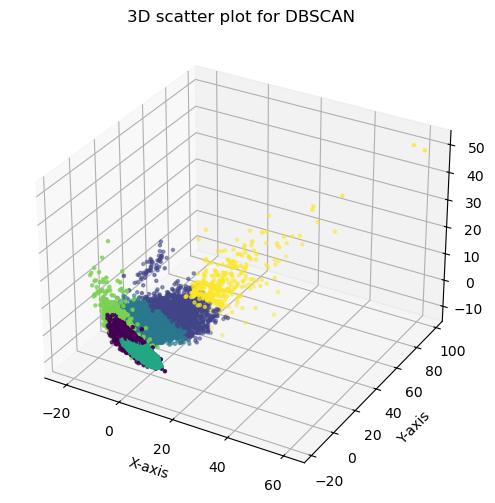

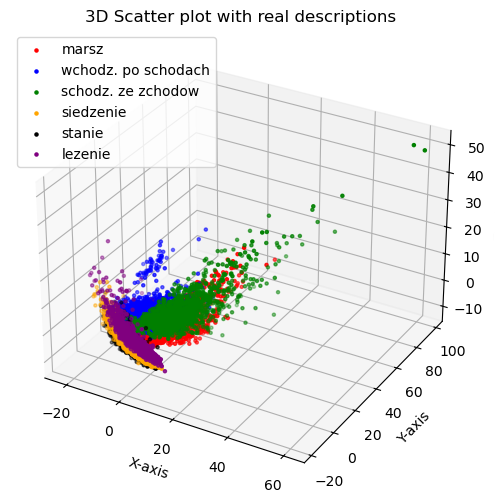

In [45]:
print('Ilość klastrow',pca_data['cluster'].unique())
display_3d_chart(pca_data['PC2'],pca_data['PC1'],pca_data['PC3'],pca_data['cluster'],'3D scatter plot for DBSCAN')
scatter_plot_3d_real(pca_data)

#### Równiez i ta metoda nie poradziła sobie dobrze z rozdzieleniem danych, aczkolwiej widać że dość dobrze rozdziela statyczne i ruchowe czynności. Również podział dla czynności statycznych jest najbardziej zbliżony do rzeczywistego podziału. Podział danych dla czynniości "ruchowych" jest inny niż w rzeczywistości, aczkolwiek w tym przypadku ekstremalnepunkty nie sostały zakwalifikowane jako outlinery lecz weszły w skład jednej grupy. 

## Klasteryzacja przy danych sprowadzonych przez PCA do wymiaru 2D 
#### W ramach testu sprawdzimy jakie n_components dla PCA będzie lepsze 3 czy może 2. Powtórzymy całą procedurę jeszcze raz

#### Wykonujemy skalowanie danych i wykonujemy PCA z n_components=2

In [49]:
stand_data = Sc.fit_transform(df)
pca = PCA(n_components=2) 
pca_data = pd.DataFrame(pca.fit_transform(stand_data),columns=['PC1','PC2'])

## Metoda KMeans
#### Wyznaczamy optymalne k dla KMeans za pomocą metody łokcia

In [51]:
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(pca_data)
    for k in range(2, 20) 
]

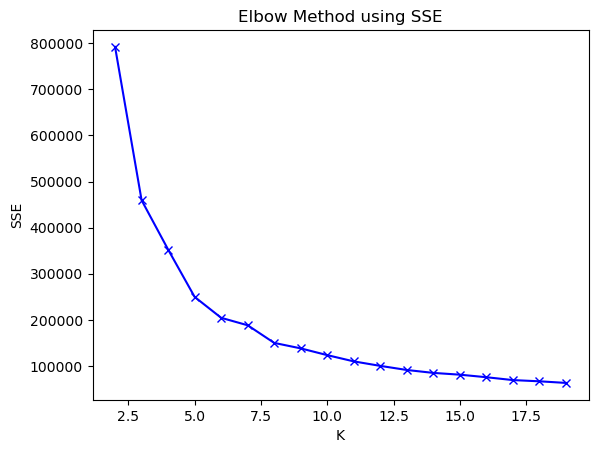

In [52]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

#### Wyniki są podobne jakpoprzednio wydaje się że 5 lub 6 klastrów to optymalna ilość. Wbieramy 6

In [54]:
kmeans =KMeans(n_clusters=6).fit(pca_data)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
pca_data['labels'] = labels

In [55]:
def display_clustering_2d(pca_data,descr):
    fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 5))
    x=pca_data['PC1']
    y=pca_data['PC2']
    ax[0].scatter(x, y, c=pca_data['cluster'], marker='.')
    ax[0].set_xlabel(f'{descr}')
    for category in range (1,7):
        x = pca_data[pca_data['labels']==category].loc[:,['PC1']]
        y =  pca_data[pca_data['labels']==category].loc[:,['PC2']]
        ax[1].scatter(x, y, c = color(category) , label=labeling(category), marker='.')
    ax[1].set_xlabel('2D Scatter plot with real labels')
    ax[1].set_ylabel('Y-axis')
    ax[1].legend()
    plt.show()

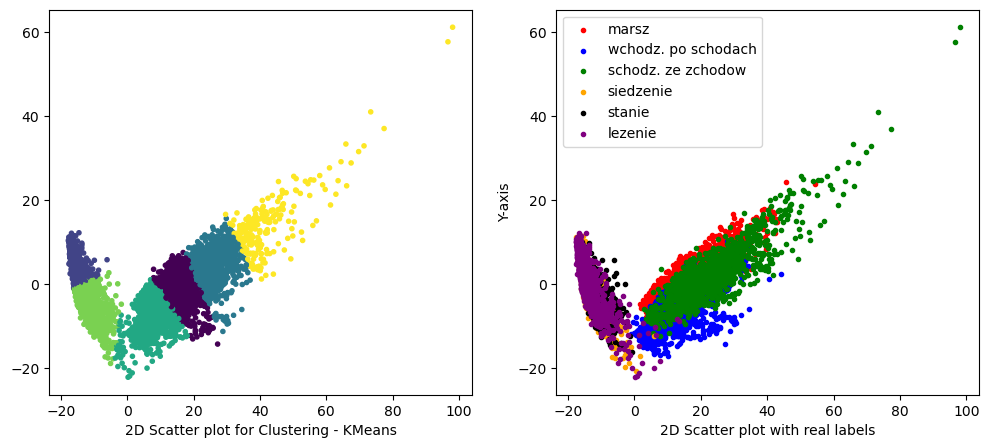

In [56]:
display_clustering_2d(pca_data,'2D Scatter plot for Clustering - KMeans')

#### Wynik dla KMeans bardzo podobny jak poprzednio. Dość dobrze wychwycona różnica pomiedzy czynnościami wymagającymi ruchu a spoczynkowymi, ale podział wewnątrz tych 2 podgrup już inny niż rzeczywistość. 

## Metoda DBSCAN

In [59]:
pca_data.drop(['cluster','labels'],axis=1,inplace=True)

In [60]:
dbscan = DBSCAN(eps=1.9, min_samples=10)
db_scan = dbscan.fit(pca_data)
pca_data['cluster'] = pd.Categorical(db_scan.labels_)
pca_data['labels'] = labels

Ilość klastrow [0, 1, -1, 2]
Categories (4, int64): [-1, 0, 1, 2]


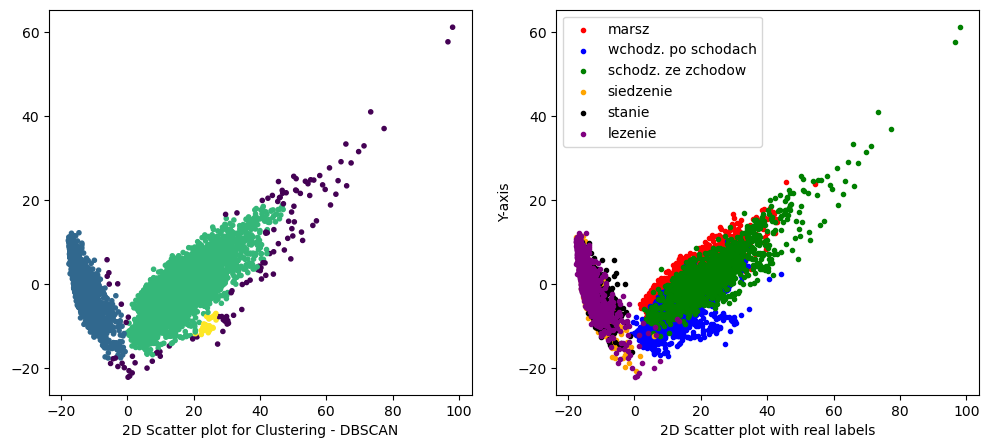

In [61]:
print('Ilość klastrow',pca_data['cluster'].unique())
display_clustering_2d(pca_data,'2D Scatter plot for Clustering - DBSCAN')

#### Wynik dla DBSCAN również  bardzo podobny jak poprzednio. Równiez wyraźne 2 grupy i jedna zawierająca dane z wchodzenia po schodach oraz wiele outlinerów

## Metoda GaussianMixture

In [64]:
pca_data.drop(['cluster','labels'],axis=1,inplace=True)

In [65]:
gm = GaussianMixture(n_components=6, n_init=50, random_state=42, covariance_type="full")
gauss_mix = gm.fit(pca_data)
pca_data['cluster'] = pd.Categorical(gauss_mix.predict(pca_data))
pca_data['labels'] = labels
print('Ilość klastrow',pca_data['cluster'].unique())

Ilość klastrow [4, 1, 5, 2, 3, 0]
Categories (6, int64): [0, 1, 2, 3, 4, 5]


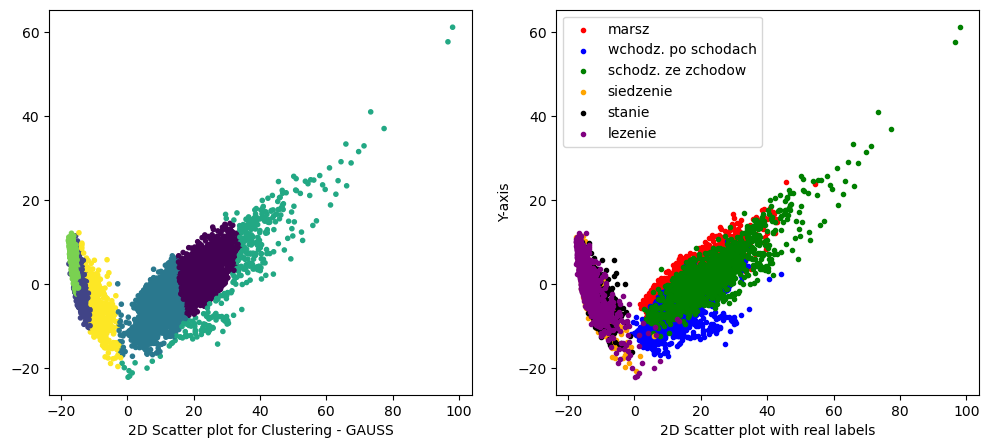

In [66]:
display_clustering_2d(pca_data,'2D Scatter plot for Clustering - GAUSS')

#### Wynik równiez bardzo podobny jak poprzenio. WNioski podobne jak dla GaussianMixture w 3D

## BONUS 
#### Niestety ze względu na duża ilość punktów poszczególne grupy nie sa dość dobrze widoczne na wykresach w związku z przysłanieniem punktów które były wrysowane póxniej na wykresie. Niestety ustawienie transparentności punktów przy takiej ilości danych nie pomaga, ale można wyświetlić każdą grupę na wierzchu z osobna by porównac jak wyglada wzgledem pozostałych grup. Wykresy poniej. 

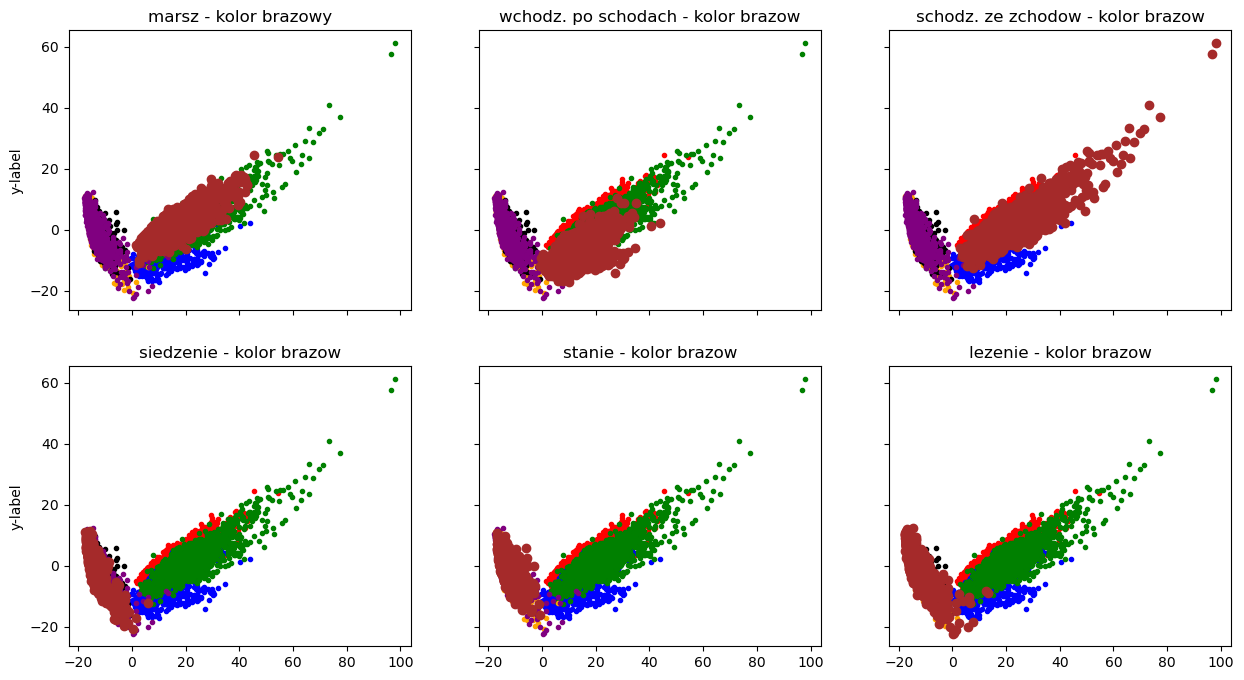

In [69]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for category in range (1,7):
    x = pca_data[pca_data['labels']==category].loc[:,['PC1']]
    y =  pca_data[pca_data['labels']==category].loc[:,['PC2']]
    axs[0, 0].scatter(x, y, c = color(category) , label=labeling(category), marker='.')
x = pca_data[pca_data['labels']==1].loc[:,['PC1']]
y = pca_data[pca_data['labels']==1].loc[:,['PC2']]
axs[0, 0].scatter(x, y, c = 'brown')
axs[0, 0].set_title('marsz - kolor brazowy')
for category in range (1,7):
    x = pca_data[pca_data['labels']==category].loc[:,['PC1']]
    y =  pca_data[pca_data['labels']==category].loc[:,['PC2']]
    axs[0, 1].scatter(x, y, c = color(category) , label=labeling(category), marker='.')
x = pca_data[pca_data['labels']==2].loc[:,['PC1']]
y = pca_data[pca_data['labels']==2].loc[:,['PC2']]
axs[0, 1].scatter(x, y, c = 'brown')
axs[0, 1].set_title('wchodz. po schodach - kolor brazow')
for category in range (1,7):
    x = pca_data[pca_data['labels']==category].loc[:,['PC1']]
    y =  pca_data[pca_data['labels']==category].loc[:,['PC2']]
    axs[0, 2].scatter(x, y, c = color(category) , label=labeling(category), marker='.')
x = pca_data[pca_data['labels']==3].loc[:,['PC1']]
y = pca_data[pca_data['labels']==3].loc[:,['PC2']]
axs[0, 2].scatter(x, y, c = 'brown')
axs[0, 2].set_title('schodz. ze zchodow - kolor brazow')
for category in range (1,7):
    x = pca_data[pca_data['labels']==category].loc[:,['PC1']]
    y =  pca_data[pca_data['labels']==category].loc[:,['PC2']]
    axs[1, 0].scatter(x, y, c = color(category) , label=labeling(category), marker='.')
x = pca_data[pca_data['labels']==4].loc[:,['PC1']]
y = pca_data[pca_data['labels']==4].loc[:,['PC2']]
axs[1, 0].scatter(x, y, c = 'brown')
axs[1, 0].set_title('siedzenie - kolor brazow')
for category in range (1,7):
    x = pca_data[pca_data['labels']==category].loc[:,['PC1']]
    y =  pca_data[pca_data['labels']==category].loc[:,['PC2']]
    axs[1, 1].scatter(x, y, c = color(category) , label=labeling(category), marker='.')
x = pca_data[pca_data['labels']==5].loc[:,['PC1']]
y = pca_data[pca_data['labels']==5].loc[:,['PC2']]
axs[1, 1].scatter(x, y, c = 'brown')
axs[1, 1].set_title('stanie - kolor brazow')
for category in range (1,7):
    x = pca_data[pca_data['labels']==category].loc[:,['PC1']]
    y =  pca_data[pca_data['labels']==category].loc[:,['PC2']]
    axs[1, 2].scatter(x, y, c = color(category) , label=labeling(category), marker='.')
x = pca_data[pca_data['labels']==6].loc[:,['PC1']]
y = pca_data[pca_data['labels']==6].loc[:,['PC2']]
axs[1, 2].scatter(x, y, c = 'brown')
axs[1, 2].set_title('lezenie - kolor brazow')

for ax in axs.flat:
    ax.set(ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()


#### Widać że grupy zwiazane z lezeniem staniem i siedzenie bardzo mocno się pokrywają i zawierają podobny zakres danych przez co ich jednoznaczne określenie podczas klasteryzacji staje się niezmiernie trudne. Równiez zbiory danych zawierajace informacje z wchodzenia, schodzenia i marszu w dużej mierze się pokrywająi równiez jest to dość trudne zadanie dla metod klasteryzacji by poprawnie je rozdzielić. 
W momencie gdy algorytm będzie próbował znaleźć centroidy o któych wiemy że znajdują się blisko siebie (dla czynności ruchowych i spoczynkowych) bedzie miał bardzo duży problem z ich identyfikacją gdyż centroidy są blisko siebie oraz zagęszczenie danych jest bardzo duże.

## Szkolenie 2 klasyfikatorów 

#### Pre processing - Przygotowanie danych. Decydujemy się na połączenie zbiorów testowych i treningowych, by mieć pewność że każda z 6 czynności jest równo reprezentowana zarówno podczas uczenia się modeli jak i ich testowania. wykonujemy więc nastepnie train_test_split z uwzglednieniem stratify=labels. 

In [73]:
df = pd.concat([train_data,test_data])
df.reset_index(inplace = True)
df.drop(['index'],axis=1,inplace=True)
labels = pd.concat([train_labels,test_labels])
labels.reset_index(inplace = True)
labels.drop(['index'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df, labels, random_state=42, test_size=0.2, stratify=labels)

#### wybieramy LogisticRegression jako pierwszy klasyfikator Supervised learning. Szkolimy go najpierw bez klasteringu, następnie z klasteringiem a na koniec ze skalowaniem i PCA, by porównać wyniki.

In [75]:
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train.values.ravel())
print("Logistic Regression bez KMeans :", log_reg.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=6, random_state=2)),
    ("log_reg", LogisticRegression( multi_class="ovr", max_iter=5000, random_state=2))
])
pipeline.fit(X_train, y_train.values.ravel())
print("Logistic Regression z KMeans :", pipeline.score(X_test, y_test))

pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('scaler_2', StandardScaler()),
    ("kmeans", KMeans(n_clusters=6, random_state=2)),
    ("log_reg", LogisticRegression( multi_class="ovr", max_iter=5000, random_state=2))
])
pipeline.fit(X_train, y_train.values.ravel())
print("Logistic Regression ze skalowniem i PCA KMeans :", pipeline.score(X_test, y_test))


Logistic Regression bez KMeans : 0.9839805825242719
Logistic Regression z KMeans : 0.7703883495145631
Logistic Regression ze skalowniem i PCA KMeans : 0.5640776699029126


#### wybieramy KNeighborsClassifier jako pierwszy klasyfikator Supervised learning. Szkolimy go najpierw bez klasteringu, następnie z klasteringiem a na koniec ze skalowaniem i PCA, by porównać wyniki.

In [77]:
KNN = KNeighborsClassifier(n_neighbors= 3)
KNN.fit(X_train, y_train.values.ravel())
print("KNN bez KMeans :", KNN.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=6, random_state=2)),
    ("KNN", KNeighborsClassifier(n_neighbors= 3))
])
pipeline.fit(X_train, y_train.values.ravel())
print("KNN z KMeans :", pipeline.score(X_test, y_test))

pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('scaler_2', StandardScaler()),
    ("kmeans", KMeans(n_clusters=6, random_state=2)),
    ("KNN", KNeighborsClassifier(n_neighbors= 3))
])
pipeline.fit(X_train, y_train.values.ravel())
print("KNN z KMeans :", pipeline.score(X_test, y_test))

KNN bez KMeans : 0.9703883495145631
KNN z KMeans : 0.7543689320388349
KNN z KMeans : 0.5194174757281553


#### Najlepsze wyniki dla Supervised Learning otrzymaliśmy gdy użyliśmy tylko klasyfikatorów. Włączenie klasteryzacji w postaci kMenans tylko pogorszyło wyniki a próby wszelkiego rodzaju skalowania danych czy przeprowadzenia PCA jeszcze bardziej zaniżyły końcowy wynik. W przypadku takich danych gdzie środki klastrów są blisko siebie i mamy bardzo duże zagęszczenie danych użycie klasteryzacji nie pomaga w przeprowadzeniu Supervised learning. 

#### czym różni się KMeans, K-fold i K Nearest Neighbors
#### KMeans - jest to algorytm używany do klasteryzacji dla unsupervised learning i jego zadaniem jest podział danych na klastry gdzie ilość klastrów jest zdefiniowana przez użytkownika. Algorytm wybiera losowe centroidy i przypisuje punkty do grup biorąc pod uwagę najmniejsze odległosci od centroidy. Nastepnie poprawia pozycję centroid by jak najbardziej pasowały do danych i znowy przypisuje punkty do grup. Robi te czynności aż centroidy przestaną się poruszać 
#### K-fold - jest to metoda polegająca na podziale danych treningowych na podzbiory a nastepnie przeprowadzeniu analiz na podzbiorach treningowych podczas gdy podzbiór walidacyjny służy do potwierdzenia wiarygodności tej analizy.   
#### K Nearest Neighbors - jest to algorytm uczenia maszynowego zaliczany do unsupervised learning. Jest on niejako interfejsem dla 3 różnych algorytmów najblizszych sasiadów: BallTree, KDTree, brute-force. wybór jest dokonywany za pomocą słowa kluczowego "algorithm" który może przyjąć wartości takie jak 'auto', 'ball_tree', 'kd_tree', 'brute'. Domyślna wartość to 'auto' algorytm sam próbuje wynaczyć najlepsze podejście. 